In [ ]:
# http://www.hellot.net/new_hellot/magazine/magazine_read.html?code=202&idx=42517&public_date=2018-09

In [ ]:
# drop 예제
# https://keras.io/ko/getting-started/sequential-model-guide/

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# 이미지 제너레이터 만들기
trainGen = ImageDataGenerator(rescale=1./255)
trainGen = trainGen.flow_from_directory('data/손글씨/train',target_size=(28,28), class_mode='categorical', batch_size=2)

testGen = ImageDataGenerator(rescale=1./255)
testGen = testGen.flow_from_directory('data/손글씨/test',target_size=(28,28), class_mode='categorical', batch_size=2)

Found 4991 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [24]:
# 모델 생성
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=20)

In [27]:
model.fit_generator(trainGen, steps_per_epoch=85, epochs=100, callbacks=[es], validation_data=testGen)

Epoch 1/100
85/85 [==============================] - 1s 8ms/step - loss: 1.6235 - accuracy: 0.1882 - val_loss: 1.5876 - val_accuracy: 0.2000
Epoch 2/100
85/85 [==============================] - 1s 6ms/step - loss: 1.6216 - accuracy: 0.2118 - val_loss: 1.5978 - val_accuracy: 0.2000
Epoch 3/100
85/85 [==============================] - 1s 6ms/step - loss: 1.6127 - accuracy: 0.1765 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 4/100
85/85 [==============================] - 1s 6ms/step - loss: 1.6153 - accuracy: 0.1647 - val_loss: 1.6129 - val_accuracy: 0.2000
Epoch 5/100
85/85 [==============================] - 0s 6ms/step - loss: 1.6105 - accuracy: 0.1647 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 6/100
85/85 [==============================] - 1s 6ms/step - loss: 1.6062 - accuracy: 0.1529 - val_loss: 1.6280 - val_accuracy: 0.2000
Epoch 7/100
85/85 [==============================] - 1s 6ms/step - loss: 1.5678 - accuracy: 0.2824 - val_loss: 1.5248 - val_accuracy: 0.3667
Epoch 8/100
8

In [14]:
valLoss = model.history.history['val_loss']
trainLoss = model.history.history['loss']

valAcc = model.history.history['val_accuracy']
trainAcc = model.history.history['accuracy']

In [15]:
import matplotlib.pyplot as plt

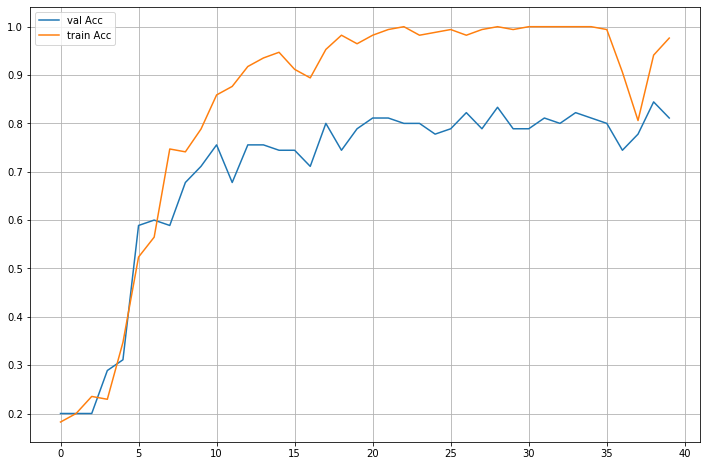

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(len(valAcc)), valAcc, label='val Acc')
plt.plot(range(len(trainAcc)), testAcc, label='train Acc')

plt.grid()
plt.legend()

plt.show()

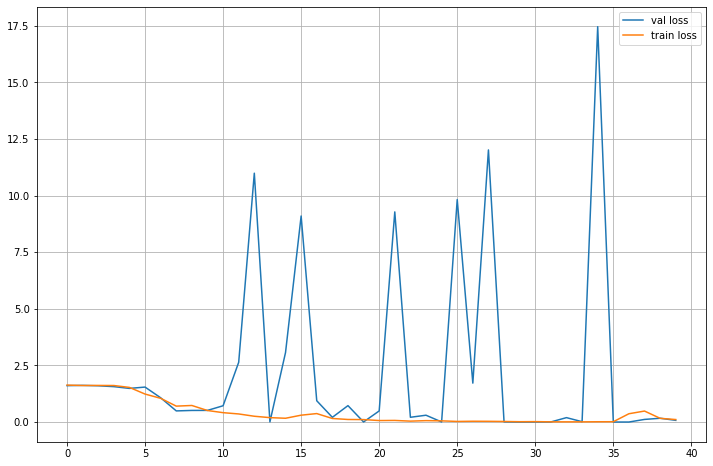

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(len(valLoss)), valLoss, label='val loss')
plt.plot(range(len(valLoss)), trainLoss, label='train loss')

# plt.plot(range(len(valAcc)), valAcc, label='val Acc')
# plt.plot(range(len(testAcc)), testAcc, label='test Acc')

plt.grid()
plt.legend()

plt.show()

In [18]:
model.evaluate_generator(testGen)

[0.07503312081098557, 0.8111110925674438]

In [19]:
import numpy as np

In [20]:
print("-- Predict --")
output = model.predict_generator(testGen, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(testGen.class_indices)
print(output)
print(testGen.filenames)

-- Predict --
{'aa': 0, 'da': 1, 'ga': 2, 'ka': 3, 'sa': 4}
[[1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.001 0.999 0.000]
 [0.001 0.001 0.995 0.003 0.000]
 [0.926 0.055 0.001 0.018 0.000]
 [0.298 0.697 0.006 0.000 0.000]
 [0.000 0.000 0.554 0.446 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [0.039 0.000 0.135 0.827 0.000]
 [0.000 0.000 0.771 0.229 0.000]
 [0.015 0.023 0.005 0.003 0.955]]
['aa\\aa_bc_03_02.jpg', 'aa\\aa_chj_03_14.jpg', 'aa\\aa_cjh_03_12.jpg', 'aa\\aa_cyh_03_09.jpg', 'aa\\aa_edy_03_18.jpg', 'aa\\aa_gjh_03_05.jpg', 'aa\\aa_hmr_03_15.jpg', 'aa\\aa_jhe_03_07.jpg', 'aa\\aa_jsy_03_06.jpg', 'aa\\aa_kgw_03_04.jpg', 'aa\\aa_kka_03_01.jpg', 'aa\\aa_kkh_03_16.jpg', 'aa\\aa_kth_03_11.jpg', 'aa\\aa_lsc_03_10.jpg', 'aa\\aa_ojm_03_08.jpg', 'aa\\aa_pkh_03_03.jpg', 'aa\\aa_say_03_17.jpg', 'aa\\aa_ykw_03_13.jpg', 'da\\da_bc_03_02.jpg', 'da\\da_chj_03_14.jpg', 'da\\da_cjh_03_12.jpg', 'da\\da_cyh_03_09.jpg', 'da\\da_edy_03_18.jpg', 'da\\da_gjh_03_05.jpg', 'da\\da_hmr_03_15.jpg', 'da\\da_jh

In [ ]:
# 이미지 증식하고 해보기

In [28]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [52]:
augGen = ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.5,
                  zoom_range=[0.8,2.0],
                  horizontal_flip=True,
                  vertical_flip=True,
                  fill_mode='nearest')

In [ ]:
import os

In [49]:
t = 'aa'

path = "./data/손글씨/train/"+str(t)
file_list = os.listdir(path)


img_to_array(load_img(path +'/'+file_list[0])).shape

(28, 28, 3)

In [56]:
# 사진 불러와 증식하기 
target = ['aa', 'da', 'ga', 'ka', 'sa']

for t in target :
    path = "./data/손글씨/train/"+str(t)
    file_list = os.listdir(path)
    
    for target_image in file_list :
        target_image = path +'/'+target_image
        img = load_img(target_image)
        
        x = img_to_array(img)
        x.shape  # (28, 28, 3)
        
        # flow함수를 이용하기 위해 4차원으로 shape 변경
        x = x.reshape((1,)+x.shape)
        
        i = 0

        for batch in augGen.flow(x, batch_size=1, save_to_dir=path, save_prefix=t, save_format='png') :
            i += 1
            if i > 50 :
                break

In [165]:
# 증식한 이미지들로 이미지 제너레이터 만들기
trainGen = ImageDataGenerator(rescale=1./255)
trainGen = trainGen.flow_from_directory('data/손글씨/train',target_size=(28,28), class_mode='categorical', batch_size=3)

validGen = ImageDataGenerator(rescale=1./255)
validGen = validGen.flow_from_directory('data/손글씨/valid',target_size=(28,28), class_mode='categorical', batch_size=3)

testGen = ImageDataGenerator(rescale=1./255)
testGen = testGen.flow_from_directory('data/손글씨/test',target_size=(28,28), class_mode='categorical', batch_size=3)

Found 4991 images belonging to 5 classes.
Found 3575 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [166]:
4991 / 3  # 1663

3575 / 3  # 1191

1191.6666666666667

In [191]:
28*28

784

In [203]:
?MaxPooling2D

In [273]:
# 모델 생성
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28,28,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(5, activation='softmax'))

In [274]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [275]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=20)

In [276]:
model.fit_generator(trainGen, steps_per_epoch=1663, epochs=10, callbacks=[es], validation_data=validGen, validation_steps=1191)

Epoch 1/10
1663/1663 [==============================] - 25s 15ms/step - loss: 1.6119 - accuracy: 0.1913 - val_loss: 1.6048 - val_accuracy: 0.2001
Epoch 2/10
1663/1663 [==============================] - 24s 14ms/step - loss: 1.6106 - accuracy: 0.1975 - val_loss: 1.6064 - val_accuracy: 0.1999
Epoch 3/10
1663/1663 [==============================] - 23s 14ms/step - loss: 1.6102 - accuracy: 0.2009 - val_loss: 1.6031 - val_accuracy: 0.2002
Epoch 4/10
1663/1663 [==============================] - 24s 14ms/step - loss: 1.6106 - accuracy: 0.1995 - val_loss: 1.5975 - val_accuracy: 0.2002
Epoch 5/10
1663/1663 [==============================] - 24s 15ms/step - loss: 1.6102 - accuracy: 0.1945 - val_loss: 1.6123 - val_accuracy: 0.2007
Epoch 6/10
1663/1663 [==============================] - 24s 14ms/step - loss: 1.6110 - accuracy: 0.2031 - val_loss: 1.5889 - val_accuracy: 0.2007
Epoch 7/10
1663/1663 [==============================] - 23s 14ms/step - loss: 1.6101 - accuracy: 0.1947 - val_loss: 1.6102 -

In [277]:
valLoss = model.history.history['val_loss']
trainLoss = model.history.history['loss']

valAcc = model.history.history['val_accuracy']
trainAcc = model.history.history['accuracy']

In [278]:
model.evaluate_generator(testGen)

[1.616700530052185, 0.20000000298023224]

In [279]:
import matplotlib.pyplot as plt

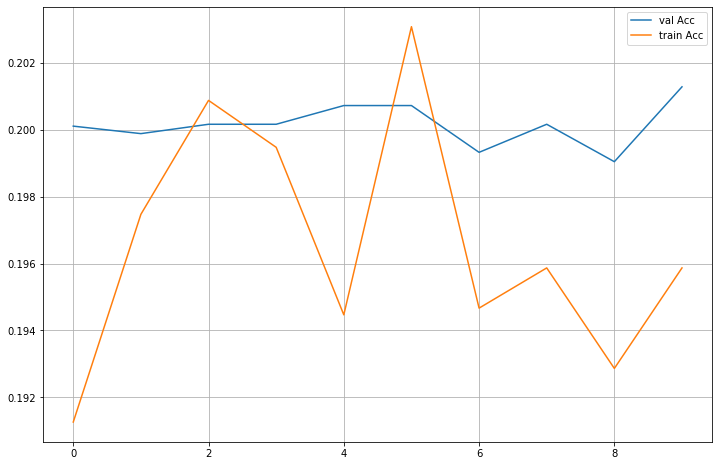

In [280]:
plt.figure(figsize=(12,8))
plt.plot(range(len(valAcc)), valAcc, label='val Acc')
plt.plot(range(len(valAcc)), trainAcc, label='train Acc')

plt.grid()
plt.legend()

plt.show()

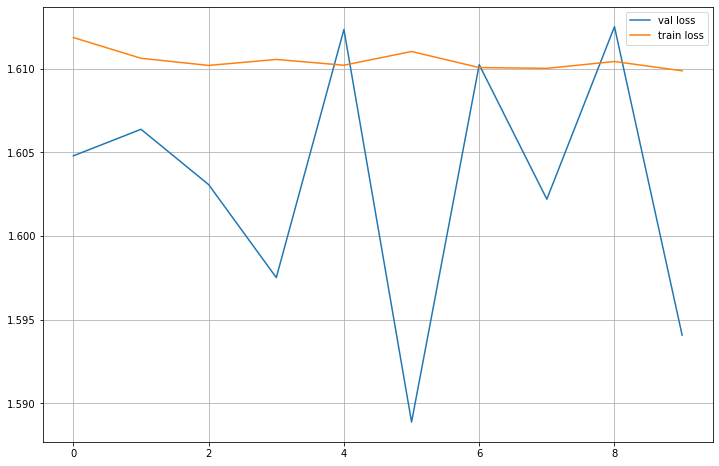

In [281]:
plt.figure(figsize=(12,8))
plt.plot(range(len(valLoss)), valLoss, label='val loss')
plt.plot(range(len(valLoss)), trainLoss, label='train loss')

# plt.plot(range(len(valAcc)), valAcc, label='val Acc')
# plt.plot(range(len(testAcc)), testAcc, label='test Acc')

plt.grid()
plt.legend()

plt.show()